In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Note, shouldn't the model response value *not* be uncertain?

In [18]:
import pandas as pd
import seaborn as sb
import cPickle as pickle
import scipy.optimize as sop

In [3]:
import gefry2

In [4]:
sb.set_style('white')
rcParams['figure.figsize'] = 8, 6
rcParams['legend.fancybox'] = True
rcParams['figure.dpi'] = 150
rcParams['savefig.dpi'] = 150
rcParams['legend.frameon'] = True
rcParams['legend.shadow'] = True

rcParams['axes.formatter.useoffset'] = False # Scientific notation

In [5]:
with open('./spec.pkl') as f:
    P, obs, sigma = pickle.load(f)

In [6]:
I = P.source.intensity
print(I)

3214000000.0


In [7]:
s_x, s_y = P.source.loc.astype(float64) # Err, are these ok as ints???

In [8]:
gefry2.util.dream2HDF5("dakota_dream", "out.h5", ["x", "y", "intensity"])

In [9]:
data = pd.HDFStore('out.h5')

In [10]:
all_chains = pd.concat(
    [
        data['/chains/{}'.format(i)][['x', 'y', 'intensity']]
        for i in xrange(8)
    ]
)

In [11]:
all_chains.describe()

,x,y,intensity
count,100000.000000,100000.000000,1.000000e+05
mean,158.180661,98.474048,4.992451e+10
std,3.927916,2.275218,2.867405e+10
min,3.574930,15.590500,1.055820e+08
25%,157.840000,98.152000,2.513765e+10
50%,158.195000,98.487200,5.010020e+10
75%,158.549000,98.820800,7.444740e+10
max,244.293000,174.460000,9.999620e+10


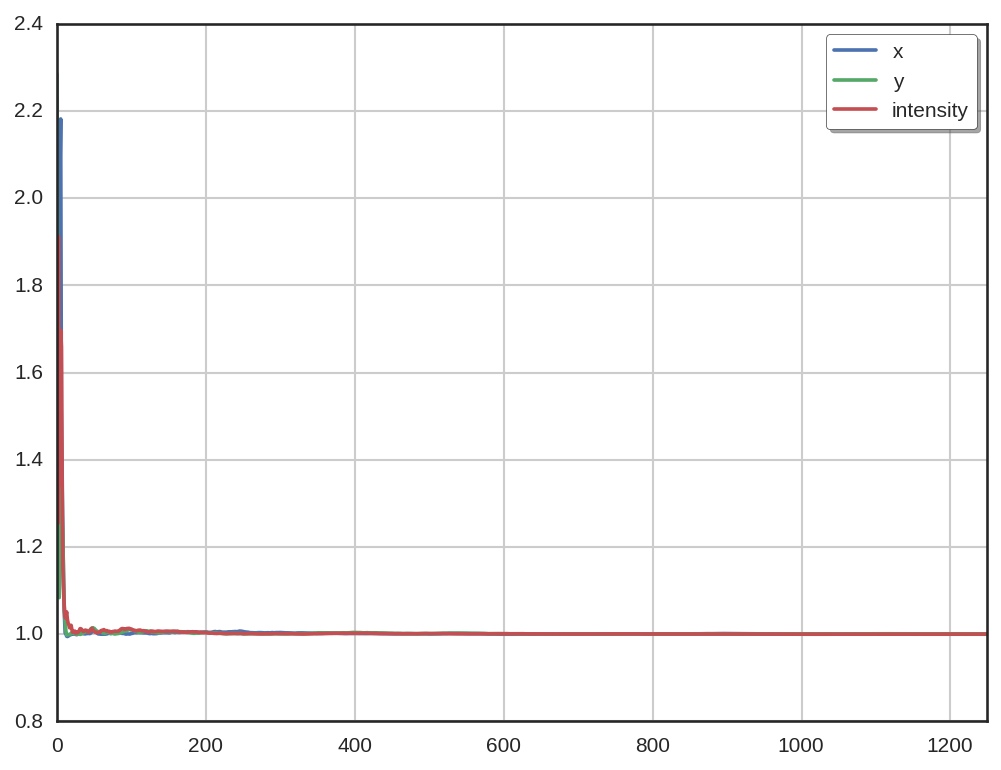

In [12]:
data['/gelman_rubin'][['x', 'y', 'intensity']].plot()

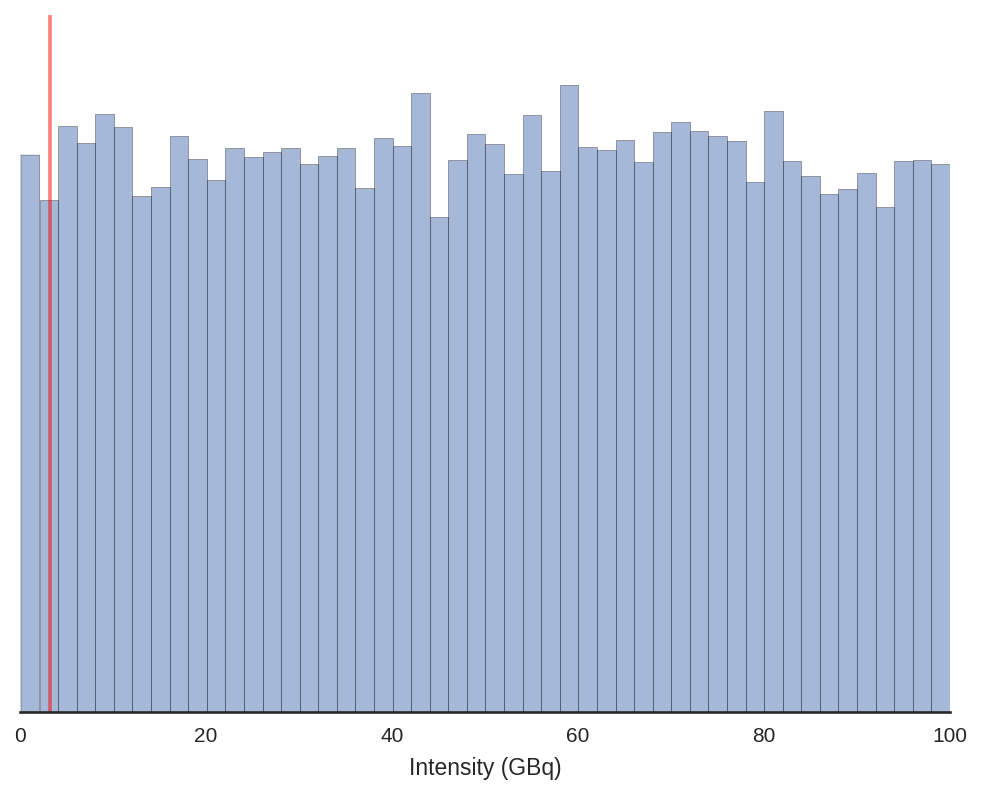

In [13]:
fig = figure()
#all_chains['intensity'].hist(bins=100)
hist(asarray(all_chains['intensity'] / 1e9), bins=50, alpha=.5)
#xlim([9000, 11000]);

ax = fig.gca()
xlabel('Intensity (GBq)')
#ylabel('Frequency')
yticks([])
sb.despine(top=True, right=True, left=True)
axvline(I / 1e9, color='red', alpha=.5)

In [21]:
def obj_fxn(X):
    x, y, i = X
    S = gefry2.Source((x, y), i)
    R = P(S, uncertain=False)
    
    return log(((obs - R) ** 2).sum())

In [29]:
bounds = [(0, 246.615), (0, 176.333), (1e8, 1e11)]

In [30]:
mle_res = sop.differential_evolution(obj_fxn, bounds)

In [32]:
x_mle, y_mle, i_mle = mle_res.x

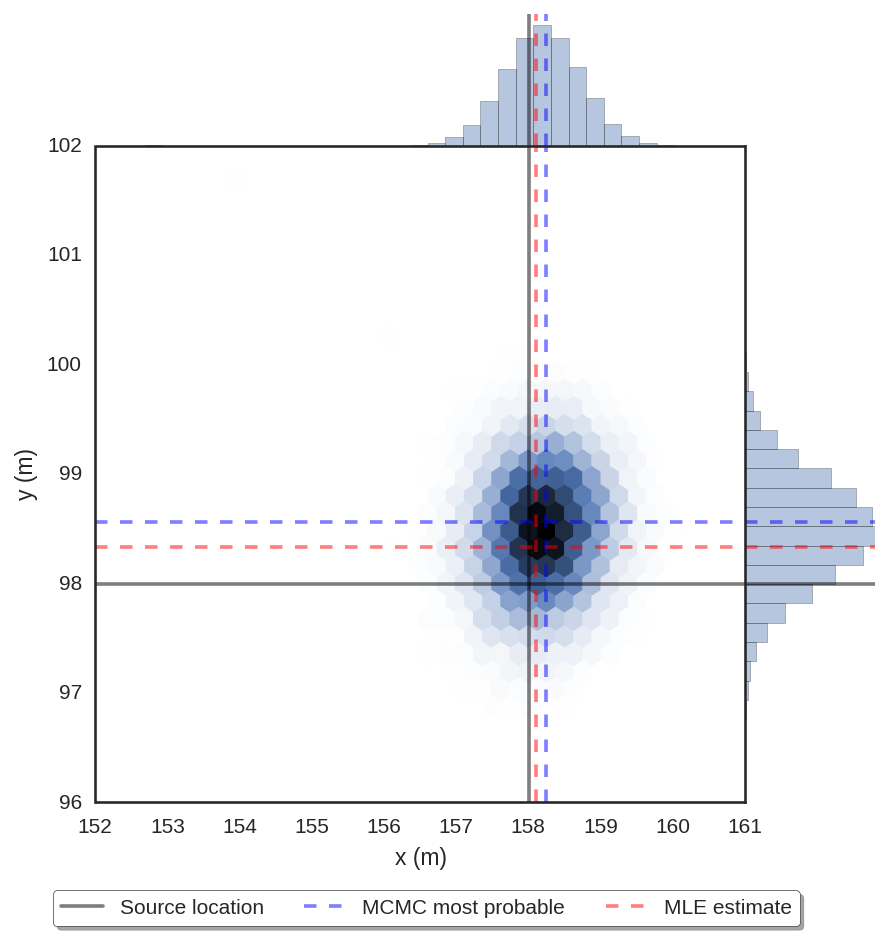

In [58]:
#box = (all_chains['x'] > .6365) & (all_chains['x'] < .6390) & \
#    (all_chains['y'] > .5065) & (all_chains['y'] < 0.510)

xmin = 152
xmax = 164
ymin = 95
ymax = 103

box = (all_chains['x'] > xmin) & (all_chains['x'] < xmax) & \
    (all_chains['y'] > ymin) & (all_chains['y'] < ymax)

data = all_chains[array(box)][['x', 'y']]

g = sb.jointplot(
    data['x'],
    data['y'],
    kind="hex",
    stat_func=None,
    joint_kws={'gridsize': 30},
    marginal_kws={'bins': 31},
    space=0,
)

g.set_axis_labels('x (m)', 'y (m)')

ax = g.ax_joint
ax_x = g.ax_marg_x
ax_y = g.ax_marg_y

# True source location
ax.axvline([s_x], color='black', alpha=.5, label='Source location')
ax.axhline([s_y], color='black', alpha=.5)
ax_x.axvline([s_x], color='black', alpha=.5)
ax_y.axhline([s_y], color='black', alpha=.5)

# MCMC most likely
mcmc_mode = all_chains[['x', 'y']].mode()

ax.axvline([mcmc_mode['x']], color='blue', linestyle='--', alpha=.5, label='MCMC most probable')
ax.axhline([mcmc_mode['y']], color='blue', linestyle='--', alpha=.5)
ax_x.axvline([mcmc_mode['x']], linestyle='--', color='blue', alpha=.5)
ax_y.axhline([mcmc_mode['y']], linestyle='--', color='blue', alpha=.5)

# MLE
ax.axvline([x_mle], color='red', linestyle='--', alpha=.5, label='MLE estimate')
ax.axhline([y_mle], color='red', linestyle='--', alpha=.5)
ax_x.axvline([x_mle], linestyle='--', color='red', alpha=.5)
ax_y.axhline([y_mle], linestyle='--', color='red', alpha=.5)

ax.legend(bbox_to_anchor=(.1, -0.22, 1., .102), loc=1,ncol=3)

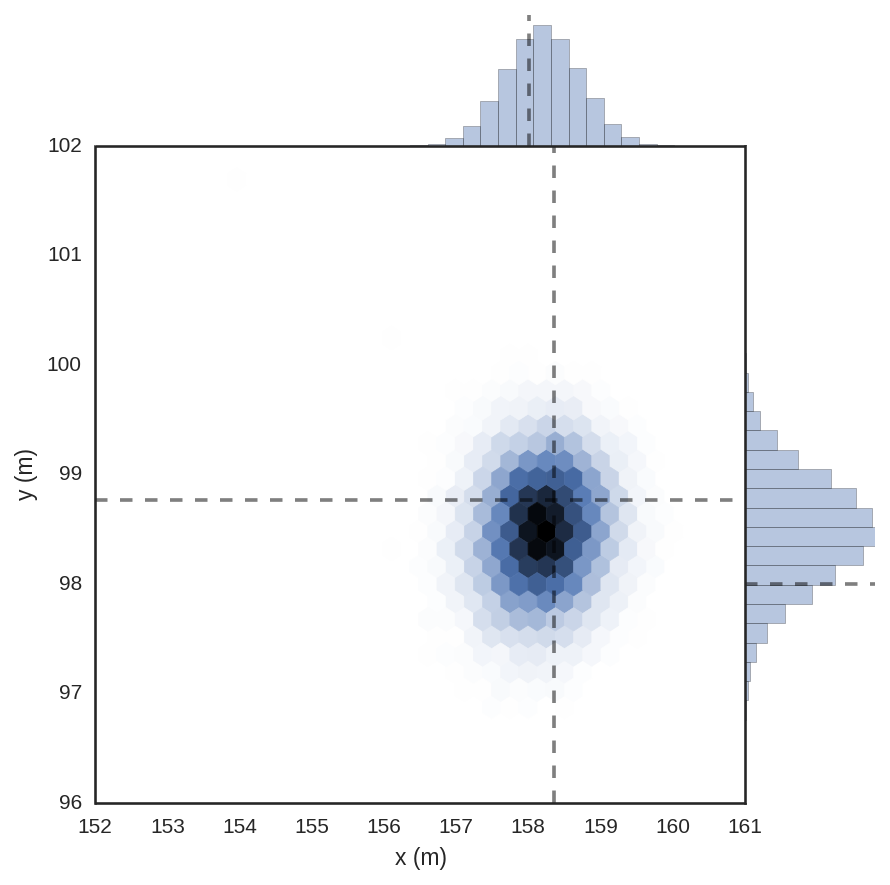

In [17]:
#box = (all_chains['x'] > .6365) & (all_chains['x'] < .6390) & \
#    (all_chains['y'] > .5065) & (all_chains['y'] < 0.510)

xmin = 152
xmax = 164
ymin = 95
ymax = 103

box = (all_chains['x'] > xmin) & (all_chains['x'] < xmax) & \
    (all_chains['y'] > ymin) & (all_chains['y'] < ymax)

data = all_chains[array(box)][['x', 'y']]

g = sb.jointplot(
    data['x'],
    data['y'],
    kind="hex",
    stat_func=None,
    joint_kws={'gridsize': 30},
    marginal_kws={'bins': 31},
    space=0,
)

g.set_axis_labels('x (m)', 'y (m)')

ax = g.ax_joint
ax_x = g.ax_marg_x
ax_y = g.ax_marg_y

ax.axvline([1.58354e2], color='black', linestyle='--', alpha=.5)
ax.axhline([9.8769e1], color='black', linestyle='--', alpha=.5)

ax_x.axvline([s_x], linestyle='--', color='black', alpha=.5)
ax_y.axhline([s_y], linestyle='--', color='black', alpha=.5)